## AdaBOOST

In [1]:

import pandas as pd
from scikitplot.metrics import plot_roc, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
import numpy as np
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
import time
import sys
import qgrid #Este paquete toca instalarlo o f
sys.path.append('..')
from sklearn.ensemble import AdaBoostClassifier
from funciones import classification_error,grafica_roc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
df=pd.read_csv('../../CSV ready to model/withoutPCA.csv')

In [2]:
le=LabelEncoder()
df['GRAVEDAD']=df.loc[:,['GRAVEDAD']].apply(le.fit_transform)
y=df['GRAVEDAD']
x=df.drop(['GRAVEDAD','PERIODO'],axis=1)


In [3]:
def model_ABC(x,y,estimadores, impresion = False):

    tiempo_i = time.time()
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,3])
    recall_list = np.zeros([4,3])
    f_list = np.zeros([4,3])
    errores = np.zeros(4)

    ABC = AdaBoostClassifier(n_estimators=estimadores)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25) # Modificar metodología de validación

        ABC.fit(Xtrain, Ytrain)
        pred = ABC.predict(Xtest)

        #code for calculating accuracy
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision
        _precisions_ = precision_score(Ytest, pred, average=None,zero_division=1)
        precision_list[j] = _precisions_

        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        errores[j] = classification_error(pred, Ytest)


    if impresion == True:
        skplt.metrics.plot_confusion_matrix(Ytest, pred)
        grafica_roc(model=ABC,Xtest=Xtest,Ytest=Ytest)

    result={'Eficiencia':np.mean(accuracy_list),'Int_Eficiencia':np.std(accuracy_list),
        'Sensibilidad':np.mean(recall_list),'Int_Sensibilidad':np.std(recall_list),
        'Precisión':np.mean(precision_list),'Int Precisión':np.std(precision_list),
        'F':np.mean(f_list),'Int_F':np.std(f_list),
        'Error':np.mean(errores),'Int_Error':np.std(errores),
        'Tiempo':time.time()-tiempo_i
        }
    return  result

In [16]:
pd.options.mode.chained_assignment = None
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de estimadores' : pd.Series([5,8,15,25,50,100,200,250])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""

df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de estimadores'], inplace=True)

for n in df_types.index:
    result = model_ABC(x,y,n,impresion = False)
    df_types["Eficiencia"][n] = result['Eficiencia']
    df_types["Int_Eficiencia"][n] = result['Int_Eficiencia']
    df_types["Sensibilidad"][n] = result['Sensibilidad']
    df_types["Int_Sensibilidad"][n] = result['Int_Sensibilidad']
    df_types["Precision"][n] = result['Precisión']
    df_types["Int_Precision"][n] = result['Precisión']
    df_types["F-Score"][n] = result['F']
    df_types["Int_F-Score"][n] = result['Int_F']
    df_types["Error_Prueba"][n] = result['Error']
    df_types["Int_error"][n] = result['Int_Error']
    df_types["Tiempo de ejecución"][n] = result['Tiempo']


In [17]:
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

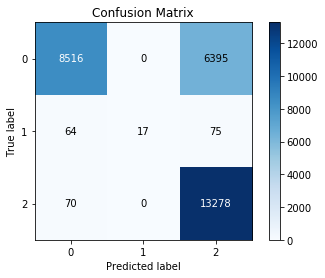

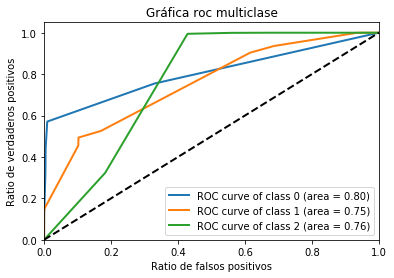

In [4]:
result= model_ABC(x=x,y=y,estimadores=5, impresion = True)

In [5]:
print(result)

{'Eficiencia': 0.7665141650536689, 'Int_Eficiencia': 0.0008870021580945786, 'Sensibilidad': 0.5685045861766792, 'Int_Sensibilidad': 0.3501651427268195, 'Precisión': 0.8845289050943014, 'Int Precisión': 0.15251156024316873, 'F': 0.5886010321624938, 'Int_F': 0.24830959198694863, 'Error': 0.23348583494633116, 'Int_Error': 0.0008870021580945689, 'Tiempo': 1.6216351985931396}
